In [1]:
import os
import pandas as pd
import numpy as np
import warnings # to ignore error messages

warnings.filterwarnings(action='ignore')

In [3]:
PATH = './kakr-4th-competition/'
train = pd.read_csv(PATH + 'train.csv')
test  = pd.read_csv(PATH + 'test.csv')

* id
* age : 나이
* workclass : 고용 형태
* fnlwgt : 사람 대표성을 나타내는 가중치 (final weight의 약자)
* education : 교육 수준
* education_num : 교육 수준 수치
* marital_status: 결혼 상태
* occupation : 업종
* relationship : 가족 관계
* race : 인종
* sex : 성별
* capital_gain : 양도 소득
* capital_loss : 양도 손실
* hours_per_week : 주당 근무 시간
* native_country : 국적
* income : 수익 (예측해야 하는 값)
    * \>50K : 1
    * <=50K : 0

In [4]:
train.sample(10)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
25928,25928,43,Private,117158,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,>50K
25536,25536,60,Private,193235,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,24,United-States,<=50K
89,89,28,Private,389713,HS-grad,9,Divorced,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
11948,11948,25,Private,430084,Some-college,10,Never-married,Transport-moving,Not-in-family,Black,Male,0,0,40,United-States,<=50K
3430,3430,33,Private,199046,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
5890,5890,48,Federal-gov,167749,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
22652,22652,33,Local-gov,194901,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
18479,18479,23,Federal-gov,344394,Some-college,10,Married-civ-spouse,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K
21929,21929,58,Local-gov,368797,Masters,14,Widowed,Prof-specialty,Unmarried,White,Male,0,0,35,United-States,>50K
14091,14091,55,Private,118993,Some-college,10,Separated,Exec-managerial,Unmarried,White,Female,0,0,10,United-States,<=50K


In [5]:
train.describe()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,26049.000000,26049.000000,2.604900e+04,26049.000000,26049.00000,26049.000000,26049.000000
mean,13024.000000,38.569235,1.903045e+05,10.088372,1087.68970,87.732734,40.443126
std,7519.842917,13.671489,1.059663e+05,2.567610,7388.85469,403.230205,12.361850
min,0.000000,17.000000,1.376900e+04,1.000000,0.00000,0.000000,1.000000
25%,6512.000000,28.000000,1.181080e+05,9.000000,0.00000,0.000000,40.000000
50%,13024.000000,37.000000,1.788660e+05,10.000000,0.00000,0.000000,40.000000
75%,19536.000000,48.000000,2.377350e+05,12.000000,0.00000,0.000000,45.000000
max,26048.000000,90.000000,1.484705e+06,16.000000,99999.00000,4356.000000,99.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.2+ MB


In [7]:
train.native_country.value_counts()

United-States                 23371
Mexico                          534
?                               456
Philippines                     163
Germany                         101
Puerto-Rico                      95
Canada                           92
El-Salvador                      79
India                            77
Cuba                             76
England                          67
Jamaica                          64
South                            63
China                            57
Guatemala                        52
Columbia                         52
Italy                            50
Vietnam                          50
Dominican-Republic               48
Poland                           47
Japan                            47
Taiwan                           39
Haiti                            35
Iran                             35
Portugal                         30
Nicaragua                        28
Peru                             26
Ecuador                     

In [8]:
train.workclass.value_counts()

Private             18123
Self-emp-not-inc     2030
Local-gov            1692
?                    1502
State-gov            1043
Self-emp-inc          877
Federal-gov           765
Without-pay            11
Never-worked            6
Name: workclass, dtype: int64

In [9]:
train.capital_gain.describe(percentiles=[.99])

count    26049.00000
mean      1087.68970
std       7388.85469
min          0.00000
50%          0.00000
99%      15024.00000
max      99999.00000
Name: capital_gain, dtype: float64

In [10]:
train.loc[train.capital_gain == 99999, :]

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
227,227,24,?,151153,Some-college,10,Never-married,?,Not-in-family,Asian-Pac-Islander,Male,99999,0,50,South,>50K
430,430,55,Private,408537,9th,5,Divorced,Craft-repair,Unmarried,White,Female,99999,0,37,United-States,>50K
848,848,32,Private,330715,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K
852,852,66,Private,115498,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,?,>50K
1209,1209,37,Local-gov,287306,Assoc-acdm,12,Married-civ-spouse,Prof-specialty,Wife,Black,Female,99999,0,40,?,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25535,25535,55,Private,197399,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
25648,25648,64,Self-emp-inc,185912,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,35,United-States,>50K
25705,25705,41,Private,115932,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,>50K
25824,25824,50,Self-emp-not-inc,132716,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,>50K


In [11]:
train.loc[train.capital_gain == 99999, 'age']

227      24
430      55
848      32
852      66
1209     37
         ..
25535    55
25648    64
25705    41
25824    50
25987    63
Name: age, Length: 127, dtype: int64

In [12]:
train.capital_gain == 99999

0        False
1        False
2        False
3        False
4        False
         ...  
26044    False
26045    False
26046    False
26047    False
26048    False
Name: capital_gain, Length: 26049, dtype: bool

In [13]:
train.loc[train.race == 'White', :]

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
6,6,43,State-gov,206139,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26042,26042,48,Self-emp-not-inc,191389,Some-college,10,Separated,Sales,Unmarried,White,Female,0,0,50,United-States,<=50K
26044,26044,57,Private,250201,11th,7,Married-civ-spouse,Other-service,Husband,White,Male,0,0,52,United-States,<=50K
26045,26045,23,Private,238092,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
26046,26046,78,?,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States,<=50K


In [14]:
train['income'].map(lambda x : int(x == ">50K"))

0        1
1        0
2        0
3        0
4        0
        ..
26044    0
26045    0
26046    0
26047    0
26048    0
Name: income, Length: 26049, dtype: int64

In [15]:
train.income = train['income'].map(lambda x : int(x == ">50K"))
train.sample(10)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
21546,21546,20,Private,205975,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Female,0,0,20,United-States,0
7082,7082,30,Private,118861,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,0,50,United-States,1
12654,12654,18,Private,57413,Some-college,10,Divorced,Other-service,Own-child,White,Male,0,0,15,United-States,0
6823,6823,20,State-gov,177787,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,20,United-States,0
23,23,29,Private,204862,Assoc-acdm,12,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
21780,21780,25,Self-emp-inc,90752,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,50,United-States,0
24782,24782,51,Private,441637,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,0
25773,25773,60,?,191118,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,1848,40,United-States,1
14030,14030,27,State-gov,280618,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,0
6898,6898,67,Private,101132,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,1797,0,40,United-States,0


In [16]:
train.shape

(26049, 16)

In [17]:
train.apply(lambda x : x['age'] + x['hours_per_week'], axis=1)

0        100
1         37
2         34
3         46
4         44
        ... 
26044    109
26045     63
26046     93
26047     66
26048     50
Length: 26049, dtype: int64

<AxesSubplot:>

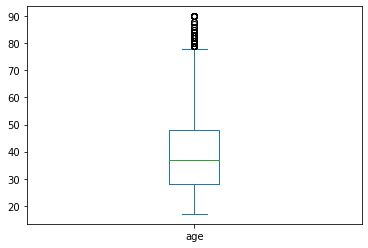

In [18]:
train.age.plot(kind='box')

In [19]:
train.apply(lambda x: "?" in list(x), axis=1)

0        False
1        False
2        False
3        False
4         True
         ...  
26044    False
26045    False
26046     True
26047    False
26048     True
Length: 26049, dtype: bool

In [20]:
train[train.apply(lambda x: "?" in list(x), axis=1)]

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,0
11,11,21,?,204226,Some-college,10,Never-married,?,Unmarried,White,Female,0,0,35,United-States,0
30,30,20,?,202994,Some-college,10,Never-married,?,Own-child,White,Female,0,0,16,United-States,0
34,34,31,?,505438,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,30,Mexico,0
66,66,67,?,39100,HS-grad,9,Married-civ-spouse,?,Wife,White,Female,0,0,5,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26009,26009,73,?,89852,1st-4th,2,Married-civ-spouse,?,Husband,White,Male,0,0,40,Portugal,0
26010,26010,63,?,321403,9th,5,Separated,?,Not-in-family,Black,Male,0,0,40,United-States,0
26012,26012,36,?,214896,9th,5,Divorced,?,Unmarried,White,Female,0,0,40,Mexico,0
26046,26046,78,?,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States,0


In [21]:
train.workclass.value_counts()

Private             18123
Self-emp-not-inc     2030
Local-gov            1692
?                    1502
State-gov            1043
Self-emp-inc          877
Federal-gov           765
Without-pay            11
Never-worked            6
Name: workclass, dtype: int64

In [22]:
train.occupation.value_counts()

Prof-specialty       3304
Craft-repair         3262
Exec-managerial      3246
Sales                2998
Adm-clerical         2983
Other-service        2626
Machine-op-inspct    1582
?                    1508
Transport-moving     1270
Handlers-cleaners    1092
Farming-fishing       784
Tech-support          742
Protective-serv       522
Priv-house-serv       123
Armed-Forces            7
Name: occupation, dtype: int64

In [23]:
train[(train['workclass'] == '?')&(train['occupation'] == '?')]

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
11,11,21,?,204226,Some-college,10,Never-married,?,Unmarried,White,Female,0,0,35,United-States,0
30,30,20,?,202994,Some-college,10,Never-married,?,Own-child,White,Female,0,0,16,United-States,0
34,34,31,?,505438,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,30,Mexico,0
66,66,67,?,39100,HS-grad,9,Married-civ-spouse,?,Wife,White,Female,0,0,5,United-States,0
67,67,65,?,404601,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,2414,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26009,26009,73,?,89852,1st-4th,2,Married-civ-spouse,?,Husband,White,Male,0,0,40,Portugal,0
26010,26010,63,?,321403,9th,5,Separated,?,Not-in-family,Black,Male,0,0,40,United-States,0
26012,26012,36,?,214896,9th,5,Divorced,?,Unmarried,White,Female,0,0,40,Mexico,0
26046,26046,78,?,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States,0


In [24]:
train[(train['workclass'] != '?')&(train['occupation'] == '?')]

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
7929,7929,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,0
8698,8698,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,0
13008,13008,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,0
15076,15076,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,0
17531,17531,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,0
24153,24153,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,0


In [25]:
train[(train['workclass'] == '?')&(train['occupation'] != '?')]

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income


In [26]:
train.native_country.value_counts()

United-States                 23371
Mexico                          534
?                               456
Philippines                     163
Germany                         101
Puerto-Rico                      95
Canada                           92
El-Salvador                      79
India                            77
Cuba                             76
England                          67
Jamaica                          64
South                            63
China                            57
Guatemala                        52
Columbia                         52
Italy                            50
Vietnam                          50
Dominican-Republic               48
Poland                           47
Japan                            47
Taiwan                           39
Haiti                            35
Iran                             35
Portugal                         30
Nicaragua                        28
Peru                             26
Ecuador                     

In [27]:
train.loc[(train.age >= 30)&(train.workclass == '?'), 'workclass']

34       ?
66       ?
67       ?
103      ?
134      ?
        ..
25991    ?
26009    ?
26010    ?
26012    ?
26046    ?
Name: workclass, Length: 868, dtype: object

### Null check 관련 팁
데이터를 일일이 다 확인하지 않고 결측치가 있는지 확인하는 방법은?

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 3.2+ MB


In [29]:
train.describe()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
count,26049.000000,26049.000000,2.604900e+04,26049.000000,26049.00000,26049.000000,26049.000000,26049.000000
mean,13024.000000,38.569235,1.903045e+05,10.088372,1087.68970,87.732734,40.443126,0.242044
std,7519.842917,13.671489,1.059663e+05,2.567610,7388.85469,403.230205,12.361850,0.428329
min,0.000000,17.000000,1.376900e+04,1.000000,0.00000,0.000000,1.000000,0.000000
25%,6512.000000,28.000000,1.181080e+05,9.000000,0.00000,0.000000,40.000000,0.000000
50%,13024.000000,37.000000,1.788660e+05,10.000000,0.00000,0.000000,40.000000,0.000000
75%,19536.000000,48.000000,2.377350e+05,12.000000,0.00000,0.000000,45.000000,0.000000
max,26048.000000,90.000000,1.484705e+06,16.000000,99999.00000,4356.000000,99.000000,1.000000


In [30]:
sum(train.loc[train.capital_gain == 99999, 'income'])

127

In [31]:
train.loc[train.capital_gain < 99999].sort_values('capital_gain', ascending=False)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
13280,13280,27,Private,211032,Preschool,1,Married-civ-spouse,Farming-fishing,Other-relative,White,Male,41310,0,24,Mexico,0
12625,12625,19,Private,188815,HS-grad,9,Never-married,Other-service,Own-child,White,Female,34095,0,20,United-States,0
2893,2893,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,0
17707,17707,20,?,273701,Some-college,10,Never-married,?,Other-relative,Black,Male,34095,0,10,United-States,0
4703,4703,55,Self-emp-not-inc,145574,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,34095,0,60,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9047,9047,48,Private,180446,10th,6,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,0,40,United-States,0
9046,9046,28,Private,273269,Some-college,10,Never-married,Craft-repair,Not-in-family,Black,Male,0,0,40,United-States,0
9045,9045,36,Self-emp-not-inc,34180,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,70,United-States,1
9044,9044,23,?,283806,9th,5,Divorced,?,Not-in-family,White,Female,0,0,35,United-States,0


In [32]:
train['log_capital_gain'] = train.capital_gain.map(lambda x: np.log(x, where=(x!=0)))

In [33]:
train[['capital_gain', 'log_capital_gain']]

,capital_gain,log_capital_gain
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
26044,0,0.0
26045,0,0.0
26046,0,0.0
26047,0,0.0


In [34]:
train.sample(10)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,log_capital_gain
7968,7968,23,Private,31606,HS-grad,9,Never-married,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0.000000
2243,2243,27,State-gov,312692,Bachelors,13,Never-married,Tech-support,Not-in-family,White,Male,0,0,12,United-States,0,0.000000
14675,14675,64,Private,187601,Some-college,10,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0,0.000000
3715,3715,23,Private,230824,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,0,0.000000
24860,24860,33,?,369386,Some-college,10,Married-civ-spouse,?,Wife,White,Female,5178,0,40,United-States,1,8.552174
24364,24364,44,Self-emp-inc,352971,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1,0.000000
14219,14219,24,Private,241185,HS-grad,9,Never-married,Sales,Not-in-family,White,Female,0,0,48,United-States,0,0.000000
11528,11528,42,Private,191712,Bachelors,13,Divorced,Sales,Not-in-family,White,Male,0,1590,40,United-States,0,0.000000
22281,22281,29,Private,174419,HS-grad,9,Never-married,Other-service,Unmarried,White,Female,0,0,30,United-States,0,0.000000
445,445,42,State-gov,39239,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,70,United-States,0,0.000000


Min-max Scaler: 범위가 정해진 값이 필요할 때, 아웃라이어에 민감함
  
Standard Scaler: 평균을 0 표준편차를 1로 맞추어 정규분포의 특성을 가지도록 만듦, 아웃라이어에 영향을 덜 받음

In [35]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mm_scaler = MinMaxScaler()
st_scaler = StandardScaler()

In [36]:
train['fnlwgt'].values

array([168538, 101626, 353358, ..., 165694, 151626,  99891])

In [37]:
train['MM_fnlwgt'] = mm_scaler.fit_transform(train['fnlwgt'].values.reshape(-1,1))
test['MM_fnlwgt'] = mm_scaler.transform(test['fnlwgt'].values.reshape(-1,1))

train['MM_age'] = mm_scaler.fit_transform(train['age'].values.reshape(-1,1))
test['MM_age'] = mm_scaler.transform(test['age'].values.reshape(-1,1))

train['ST_fnlwgt'] = st_scaler.fit_transform(train['fnlwgt'].values.reshape(-1,1))
test['ST_fnlwgt'] = st_scaler.transform(test['fnlwgt'].values.reshape(-1,1))

train['ST_age'] = st_scaler.fit_transform(train['age'].values.reshape(-1,1))
test['ST_age'] = st_scaler.transform(test['age'].values.reshape(-1,1))

In [38]:
train.describe()[['MM_fnlwgt', 'MM_age']]

,MM_fnlwgt,MM_age
count,26049.000000,26049.000000
mean,0.120016,0.295469
std,0.072040,0.187281
min,0.000000,0.000000
25%,0.070934,0.150685
50%,0.112239,0.273973
75%,0.152261,0.424658
max,1.000000,1.000000


In [39]:
train.describe()[['ST_fnlwgt', 'ST_age']].round(6)

,ST_fnlwgt,ST_age
count,26049.000000,26049.000000
mean,-0.000000,-0.000000
std,1.000019,1.000019
min,-1.665991,-1.577710
25%,-0.681329,-0.773101
50%,-0.107947,-0.114784
75%,0.447609,0.689826
max,12.215444,3.761972


In [40]:
train

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,...,capital_gain,capital_loss,hours_per_week,native_country,income,log_capital_gain,MM_fnlwgt,MM_age,ST_fnlwgt,ST_age
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,...,0,0,60,United-States,1,0.0,0.105218,0.315068,-0.205413,0.104655
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,...,0,0,20,United-States,0,0.0,0.059729,0.000000,-0.836872,-1.577710
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,...,0,0,16,United-States,0,0.0,0.230866,0.013699,1.538759,-1.504564
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,...,0,0,25,United-States,0,0.0,0.093402,0.054795,-0.369431,-1.285125
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,...,0,0,20,?,0,0.0,0.073739,0.095890,-0.642391,-1.065686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,26044,57,Private,250201,11th,7,Married-civ-spouse,Other-service,Husband,White,...,0,0,52,United-States,0,0.0,0.160736,0.547945,0.565252,1.348143
26045,26045,23,Private,238092,Bachelors,13,Never-married,Prof-specialty,Own-child,White,...,0,0,40,United-States,0,0.0,0.152504,0.082192,0.450978,-1.138832
26046,26046,78,?,165694,Masters,14,Widowed,?,Not-in-family,White,...,0,0,15,United-States,0,0.0,0.103285,0.835616,-0.232253,2.884216
26047,26047,26,Self-emp-not-inc,151626,HS-grad,9,Never-married,Prof-specialty,Own-child,Black,...,0,0,40,United-States,0,0.0,0.093721,0.123288,-0.365014,-0.919393


In [42]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

### Onehot encoder

In [43]:
oe = OneHotEncoder()
oe_result = oe.fit_transform(train['workclass'].values.reshape(-1, 1))

In [44]:
oe_result.toarray().shape

(26049, 9)

In [45]:
oe.get_feature_names(['workclass'])

array(['workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay'], dtype=object)

In [46]:
sub = pd.DataFrame(data=oe_result.toarray(), columns=oe.get_feature_names(['workclass']))

In [47]:
pd.concat([train, sub], axis=1)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,...,ST_age,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,...,0.104655,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,...,-1.577710,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,...,-1.504564,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,...,-1.285125,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,...,-1.065686,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,26044,57,Private,250201,11th,7,Married-civ-spouse,Other-service,Husband,White,...,1.348143,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
26045,26045,23,Private,238092,Bachelors,13,Never-married,Prof-specialty,Own-child,White,...,-1.138832,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
26046,26046,78,?,165694,Masters,14,Widowed,?,Not-in-family,White,...,2.884216,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26047,26047,26,Self-emp-not-inc,151626,HS-grad,9,Never-married,Prof-specialty,Own-child,Black,...,-0.919393,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Label encoder

In [48]:
le = LabelEncoder()
le.fit_transform(train['workclass'].values.reshape(-1, 1))

array([4, 4, 4, ..., 0, 6, 0])

In [49]:
le.inverse_transform

<bound method LabelEncoder.inverse_transform of LabelEncoder()>

In [50]:
workclass_to_label = dict(zip(train['workclass'].unique(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [51]:
train['workclass'].map(workclass_to_label)

0        0
1        0
2        0
3        0
4        0
        ..
26044    0
26045    0
26046    2
26047    3
26048    2
Name: workclass, Length: 26049, dtype: int64

### (Target) Mean Encoding

In [52]:
train

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,...,capital_gain,capital_loss,hours_per_week,native_country,income,log_capital_gain,MM_fnlwgt,MM_age,ST_fnlwgt,ST_age
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,...,0,0,60,United-States,1,0.0,0.105218,0.315068,-0.205413,0.104655
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,...,0,0,20,United-States,0,0.0,0.059729,0.000000,-0.836872,-1.577710
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,...,0,0,16,United-States,0,0.0,0.230866,0.013699,1.538759,-1.504564
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,...,0,0,25,United-States,0,0.0,0.093402,0.054795,-0.369431,-1.285125
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,...,0,0,20,?,0,0.0,0.073739,0.095890,-0.642391,-1.065686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,26044,57,Private,250201,11th,7,Married-civ-spouse,Other-service,Husband,White,...,0,0,52,United-States,0,0.0,0.160736,0.547945,0.565252,1.348143
26045,26045,23,Private,238092,Bachelors,13,Never-married,Prof-specialty,Own-child,White,...,0,0,40,United-States,0,0.0,0.152504,0.082192,0.450978,-1.138832
26046,26046,78,?,165694,Masters,14,Widowed,?,Not-in-family,White,...,0,0,15,United-States,0,0.0,0.103285,0.835616,-0.232253,2.884216
26047,26047,26,Self-emp-not-inc,151626,HS-grad,9,Never-married,Prof-specialty,Own-child,Black,...,0,0,40,United-States,0,0.0,0.093721,0.123288,-0.365014,-0.919393


In [53]:
male_positive = train.loc[train['sex']=='Male', "income"]
female_positive = train.loc[train['sex']=='Female', "income"]

In [54]:
male_positive.value_counts() / male_positive.shape[0]

0    0.693857
1    0.306143
Name: income, dtype: float64

In [55]:
female_positive.value_counts() / female_positive.shape[0]

0    0.888759
1    0.111241
Name: income, dtype: float64

In [56]:
dummied = pd.get_dummies(train)
dummied

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,log_capital_gain,MM_fnlwgt,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0,40,168538,9,0,0,60,1,0.0,0.105218,...,0,0,0,0,0,0,0,1,0,0
1,1,17,101626,5,0,0,20,0,0.0,0.059729,...,0,0,0,0,0,0,0,1,0,0
2,2,18,353358,10,0,0,16,0,0.0,0.230866,...,0,0,0,0,0,0,0,1,0,0
3,3,21,151158,10,0,0,25,0,0.0,0.093402,...,0,0,0,0,0,0,0,1,0,0
4,4,24,122234,10,0,0,20,0,0.0,0.073739,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,26044,57,250201,7,0,0,52,0,0.0,0.160736,...,0,0,0,0,0,0,0,1,0,0
26045,26045,23,238092,13,0,0,40,0,0.0,0.152504,...,0,0,0,0,0,0,0,1,0,0
26046,26046,78,165694,14,0,0,15,0,0.0,0.103285,...,0,0,0,0,0,0,0,1,0,0
26047,26047,26,151626,9,0,0,40,0,0.0,0.093721,...,0,0,0,0,0,0,0,1,0,0


### PCA

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=60, svd_solver='full')

In [58]:
dummied = dummied.drop(columns=['id'])

In [59]:
X_train_std =  st_scaler.fit_transform(dummied)
X_train_pca = pca.fit_transform(X_train_std)

In [60]:
X_train_std.shape

(26049, 113)

In [61]:
X_train_pca.shape

(26049, 60)

In [62]:
pca.explained_variance_

array([5.49264337, 3.45836669, 3.15394497, 2.91027601, 2.53840261,
       2.37425135, 1.91605667, 1.80630214, 1.6189918 , 1.58081079,
       1.46452153, 1.42146653, 1.39609963, 1.34450843, 1.29119203,
       1.25565586, 1.24692846, 1.20325976, 1.19709166, 1.17981712,
       1.16065914, 1.14693378, 1.12961605, 1.12733134, 1.10957592,
       1.10798443, 1.09269621, 1.08955714, 1.08471687, 1.0755793 ,
       1.06588378, 1.06505629, 1.05619718, 1.05451294, 1.05236725,
       1.04407226, 1.04066087, 1.03648919, 1.03387782, 1.02578219,
       1.02400695, 1.01834419, 1.01297826, 1.00969064, 1.007153  ,
       1.00593298, 1.00547643, 1.00304802, 1.00219156, 1.00167688,
       1.00123634, 1.00102622, 1.00038397, 0.99990555, 0.99949597,
       0.99919036, 0.99716129, 0.99691014, 0.99508867, 0.99397725])

In [63]:
pca.components_.shape

(60, 113)

In [64]:
X_train_2 = X_train_std - X_train_std.mean(axis=0)

res = np.dot(X_train_2, pca.components_.T)
res

array([[ 2.09100971,  1.42907751, -0.38506353, ...,  0.13726768,
        -0.03275668, -0.26967566],
       [-3.21923508,  1.85871359, -1.1017427 , ...,  0.16625819,
        -0.25830776, -0.03204182],
       [-3.7674254 ,  2.95050573, -0.07175687, ..., -0.04466042,
        -0.1749566 ,  0.11455102],
       ...,
       [ 1.55300289, -6.67284936,  2.32711327, ..., -0.19744595,
        -0.35533846, -0.09102984],
       [-2.78413603, -0.80103632, -0.80240494, ...,  0.11049364,
         0.13318604,  0.1310229 ],
       [-3.60241637, -1.31093753, -1.88045481, ..., -0.08892496,
        -0.11936601, -0.16828669]])

In [65]:
np.allclose(X_train_pca, res)

True